Dataset loaded successfully!

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   Pedigree  Age  Outcome  
0     0.627   50        1  
1     0.351   31        0  
2     0.672   32        1  
3     0.167   21        0  
4     2.288   33        1  

Null values in each column:
 Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

Confusion Matrix:
 [[79 20]
 [28 27]]

Accuracy: 68.83%
Error Rate: 31.17%
Precision: 0.57
Recall: 0.49


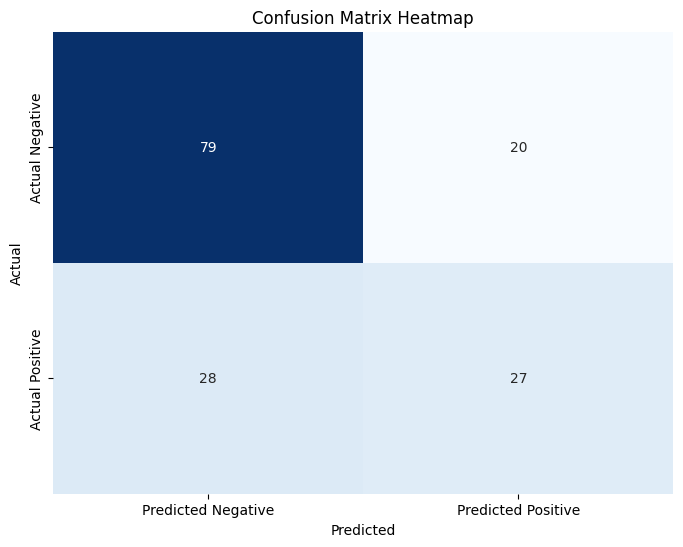

In [1]:
# --- Import required libraries ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# --- Step 1: Load the dataset ---
df = pd.read_csv("diabetes.csv")
print("Dataset loaded successfully!\n")
print(df.head())

# --- Step 2: Check for null values ---
print("\nNull values in each column:\n", df.isnull().sum())

# --- Step 3: Split dataset into features and target ---
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# --- Step 4: Standardize the feature data ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Step 5: Split data into training and testing sets ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# --- Step 6: Initialize and train KNN model ---
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# --- Step 7: Make predictions ---
y_pred = knn.predict(X_test)

# --- Step 8: Compute metrics ---
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
error_rate = 1 - acc
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# --- Step 9: Display results ---
print("\nConfusion Matrix:\n", cm)
print("\nAccuracy: {:.2f}%".format(acc * 100))
print("Error Rate: {:.2f}%".format(error_rate * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))


import seaborn as sns
import matplotlib.pyplot as plt

# --- Step 10: Visualize the confusion matrix using a heatmap ---
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()